In [1]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, set_boundaries
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 3 & tutorial name: free-energy-calculation
figures will be saved in /docs/sphinx/source/tutorials/figures/level3/free-energy-calculation/


In [6]:
PMF = np.loadtxt('PMF.dat')
xmd, PMF, _, _, _ = PMF.T

In [11]:
sigma = 3.405 # Angstrom
epsilon = 0.238 # Kcal/mol
U0 = 1.5*epsilon # Kcal/mol
delta = 0.5 # Angstrom
x0 = 10.0 # Angstrom
x = np.linspace(-25, 25, 50000)  # Angstrom
U = U0 * (np.arctan((x + x0) / delta) - np.arctan((x - x0) / delta))
F = (U0/delta)/(((x - x0)**2)/delta**2 + 1) - (U0/delta)/(((x + x0)**2)/delta**2 + 1)

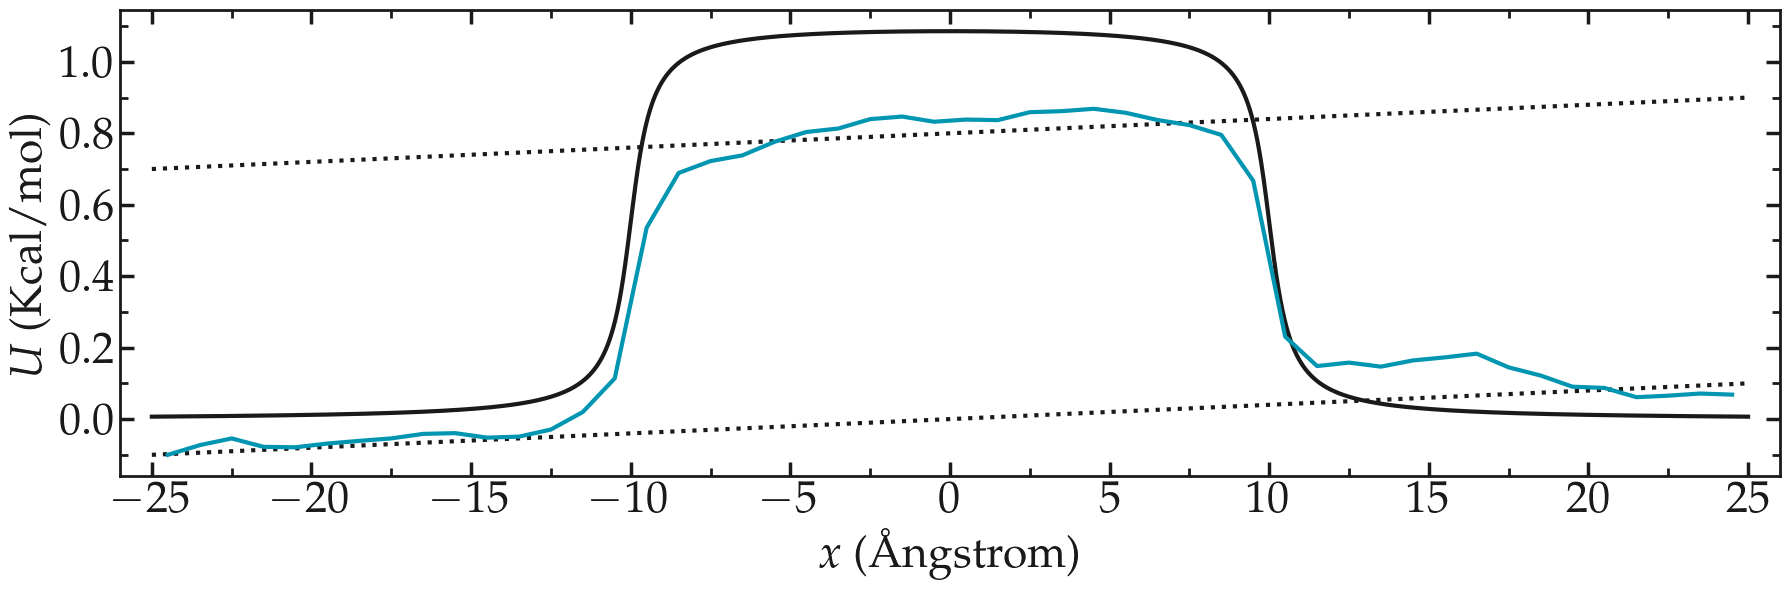

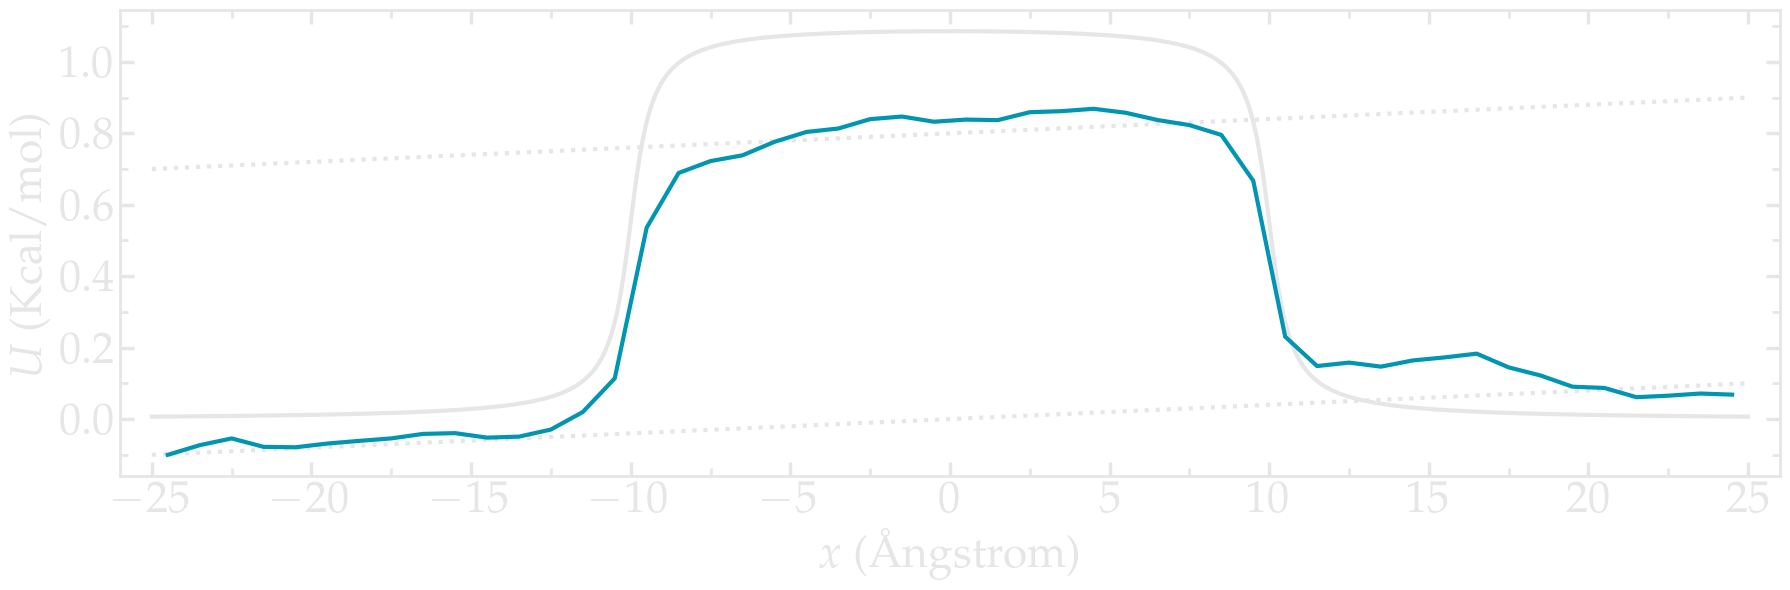

In [19]:
filename = "exercice-convection"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(x, x/250+0.8, ':', color=mygray, linewidth=3)
    ax[-1].plot(x, x/250, ':', color=mygray, linewidth=3)
    ax[-1].plot(x, U, color=mygray, linewidth=3)
    ax[-1].plot(xmd, PMF-0.1, color=colors["myblue"], linewidth=3)
    complete_panel(ax[-1], r'$x$ (Ångstrom)', r'$U$ (Kcal/mol)', legend=False, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(-25, 30, 5), x_boundaries=(-26, 26))
    save_figure(fig, mode, git_path, path_figures, filename)